# Plotting

We will plot with 3 datasets this week. Let's load them. 

In [1]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as pdr  # IF NECESSARY, from terminal: pip install pandas_datareader
import seaborn as sns
from numpy.random import default_rng

# these three are used to open the CCM dataset:
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

pd.set_option("display.max_rows", 10)  # display option for pandas
# more here: https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

## Load macro_data

In [2]:
# LOAD DATA AND CONVERT TO ANNUAL

start = 1990 # pandas datareader can infer these are years
end = 2018
macro_data = pdr.data.DataReader(['CAUR','MIUR','PAUR', # unemployment 
                                  'LXXRSA','DEXRSA','WDXRSA', # case shiller index in LA, Detroit, DC (no PA  available!)
                                  'MEHOINUSCAA672N','MEHOINUSMIA672N','MEHOINUSPAA672N'], #  
                                 'fred', start, end)
macro_data = macro_data.resample('Y').first() # get's the first observation for each variable in a given year

# CLEAN UP THE FORMATING SOMEWHAT

macro_data.index = macro_data.index.year
macro_data.columns=pd.MultiIndex.from_tuples([
    ('Unemployment','CA'),('Unemployment','MI'),('Unemployment','PA'),
    ('HouseIdx','CA'),('HouseIdx','MI'),('HouseIdx','PA'),
    ('MedIncome','CA'),('MedIncome','MI'),('MedIncome','PA')
    ])



In [3]:
year_state_tall = macro_data.stack().reset_index().rename(columns={'level_1':'state'}).sort_values(['state','DATE'])    

year_state_wide = macro_data
# one level names
year_state_wide.columns=[
    'Unemployment_CA','Unemployment_MI','Unemployment_PA',
    'HouseIdx_CA','HouseIdx_MI','HouseIdx_PA',
    'MedIncome_CA','MedIncome_MI','MedIncome_PA'
    ]

## And load CCM data

First, load the data

In [4]:
url = 'https://github.com/LeDataSciFi/ledatascifi-2022/blob/main/data/CCM_cleaned_for_class.zip?raw=true'

#firms = pd.read_stata(url)   
# <-- that code would work, but GH said it was too big and
# forced me to zip it, so here is the work around to download it:

with urlopen(url) as request:
    data = BytesIO(request.read())

with ZipFile(data) as archive:
    with archive.open(archive.namelist()[0]) as stata:
        ccm = pd.read_stata(stata)

## Sidebar: Here's a fun EDA hack:

https://github.com/pandas-profiling/pandas-profiling#examples

Notes
- Slow with huge datasets
- Doesn't wrk with multiindex column names (must be "one level")

In [5]:
# install new package (run this one time only)
# !pip install pandas-profiling[notebook]

In [6]:
from pandas_profiling import ProfileReport

# create the report:
# profile = ProfileReport(macro_data, title="Pandas Profiling Report")
# profile

### THIS WON'T RUN ON macro_data yet:
### NEED TO ADJUST THIS DATASET TO RUN A PROFILE
### COLUMN NAMES NEED TO BE SINGLE LEVEL STRINGS (NOT MULTIINDEX COL NAMES)
### OR CONVERT TO TALL SHAPE

ModuleNotFoundError: No module named 'pandas_profiling'

From the `year_state` data (wide or tall):

- Q0. How has median income has evolved over time for PA?
    - 920am: Wasti and Lana
    - 1045am: Jake and Cole
- Q1. How has unemployment changes has evolved over time for PA?   
- Q2. How has unemployment changes  has evolved over time for all states (view as one var)?  
- Q3. How has unemployment changes  has evolved over time for all states (separately)  
- Q4. How does unemployment changes vary with median income growth?

From the `ccm` data:

- Q5. Plot the distribution of R&D (`xrd_a`). Bonuses:
    - deal with outliers
    - add a title
    - change the x and y axis titles
- Q6: Compare R&D and CAPX. Bonuses:
    - don't plot outliers
    - avoid oversaturated plot

In [8]:
year_state_tall

,DATE,state,HouseIdx,MedIncome,Unemployment
0,1990,CA,100.471193,64124.0,5.2
3,1991,CA,95.569015,62568.0,7.1
6,1992,CA,92.786926,63297.0,8.6
9,1993,CA,85.246295,60272.0,9.8
12,1994,CA,77.395052,61219.0,9.3
...,...,...,...,...,...
74,2014,PA,206.947728,60385.0,6.5
77,2015,PA,208.677717,65980.0,5.5
80,2016,PA,212.055794,65776.0,5.3
83,2017,PA,218.146440,64714.0,5.2


<AxesSubplot:ylabel='MedIncome'>

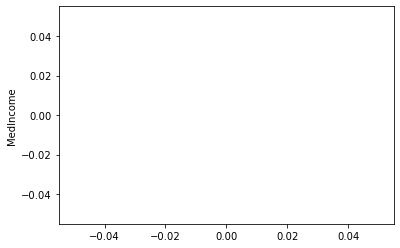

In [10]:
sns.lineplot(data=year_state_tall, y = "MedIncome", x = )